# Assignment 2 - Object Detection

## 1. Import/Install libraries
Import all libraries/packages that will be used to help fulfil the task

In [ ]:
%%capture
!pip install ultralytics

In [ ]:
import cv2
import os
import random
import re
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setting up the directories that will be used in the project (Data, train, test)

In [ ]:
prefix = "/content/drive/My Drive/ELTE AI Master/DND/Assignment 2/"
dataFile = prefix + "Dolphins/data.yaml"
testFolder = prefix + "test"
trainResults = prefix + "results/train"
valResults = prefix + "results/val"
testResults = prefix + "results/test"
# prefix = "T:\DND\Assignment 2\\"
# dataFile = "T:\DND\Assignment 2\Dolphins\data.yaml"
# testFolder = "T:\\DND\\Assignment 2\\test"

## 2. Displaying annotated images
Making up the images with the annotations and displaying them

In [ ]:
# Config the global variables
LABEL_FOLDER = prefix + 'Dolphins/train/labels'  # Put the label files in this folder.
RAW_IMAGE_FOLDER = prefix + 'Dolphins/train/images'  # Put the original images without boxes in this folder.
OUTPUT_IMAGE_FOLDER = prefix + 'Dolphins/train/annotated_images'  # The output images would be saved to this folder.
IMAGE_NAME_LIST_PATH = prefix + 'name_list.txt'  # The file name of images will be saved into this text file.
CLASS_PATH = prefix + 'classes.txt' # Put the class names in this text file.


def plot_one_box(x, image, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(
        0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

def draw_box_on_image(image_name, classes, colors, LABEL_FOLDER, RAW_IMAGE_FOLDER, OUTPUT_IMAGE_FOLDER):
    """
    This function will add rectangle boxes on the images.
    """
    txt_path = os.path.join(LABEL_FOLDER, '%s.txt' %
                            (image_name))
    # print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = os.path.join(RAW_IMAGE_FOLDER, '%s.jpg' %
                              (image_name))

    save_file_path = os.path.join(
        OUTPUT_IMAGE_FOLDER, '%s.jpg' % (image_name))

    # flag_people_or_car_data = 0
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0

    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])

        x_center, y_center, w, h = float(
            staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)

        plot_one_box([x1, y1, x2, y2], image, color=colors[class_idx],
                     label=classes[class_idx], line_thickness=None)

        cv2.imwrite(save_file_path, image)

        box_number += 1
    return box_number


def make_name_list(RAW_IMAGE_FOLDER, IMAGE_NAME_LIST_PATH):
    """
    This function will collect the image names without extension and save them in the name_list.txt.
    """
    image_file_list = os.listdir(RAW_IMAGE_FOLDER)

    text_image_name_list_file = open(IMAGE_NAME_LIST_PATH, 'w')

    for image_file_name in image_file_list:
        image_name, file_extend = os.path.splitext(image_file_name)
        text_image_name_list_file.write(image_name+'\n')

    text_image_name_list_file.close()


if __name__ == '__main__':
    make_name_list(RAW_IMAGE_FOLDER, IMAGE_NAME_LIST_PATH)

    classes = image_names = open(CLASS_PATH).read().strip().split('\n')
    random.seed(42)
    colors = [[random.randint(0, 255) for _ in range(3)]
              for _ in range(len(classes))]

    image_names = open(IMAGE_NAME_LIST_PATH, 'r').read().strip().split()

    box_total = 0
    image_total = 0
    for image_name in image_names:
        box_num = draw_box_on_image(
            image_name, classes, colors, LABEL_FOLDER, RAW_IMAGE_FOLDER, OUTPUT_IMAGE_FOLDER)
        box_total += box_num
        image_total += 1

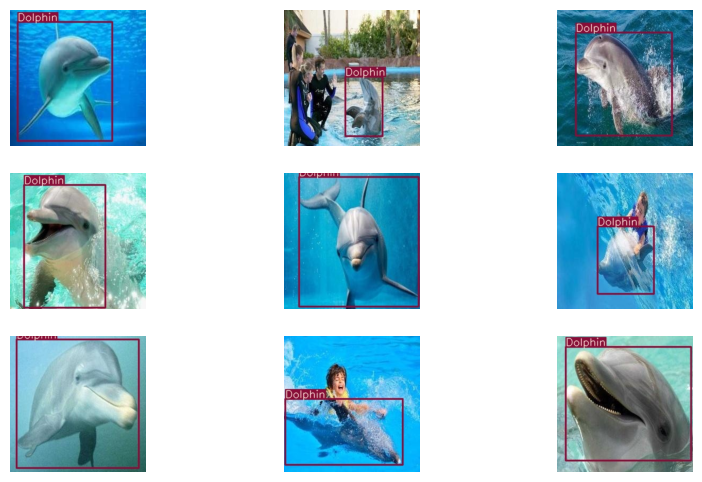

In [ ]:
plt.figure(figsize = (10,6))
all_files = os.listdir(OUTPUT_IMAGE_FOLDER)
data_path = [os.path.join(OUTPUT_IMAGE_FOLDER + "/" + i) for i in all_files]
sample = random.sample(data_path, 9)

for count,i in enumerate(sample):
    plt.subplot(int(len(sample)/3),int(len(sample)/3),count+1)
    plt.imshow(plt.imread(i))
    plt.axis('off')
plt.show()

## 3. YOLOv8 Model


### Training the model
Loading and traing the Yolo model

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
modelTrain = model.train(data=dataFile, epochs=10, imgsz=256, project=trainResults)

Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/ELTE AI Master/DND/Assignment 2/Dolphins/data.yaml, epochs=10, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/ELTE AI Master/DND/Assignment 2/results/train, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=

train: Scanning /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/Dolphins/train/labels.cache... 86 images, 0 backgrounds, 0 corrupt: 100%|██████████| 86/86 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/Dolphins/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]


Plotting labels to /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/results/train/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/results/train/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.8831      2.363      1.189          6        256: 100%|██████████| 6/6 [00:13<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         22         22    0.00708          1      0.856      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.7761      1.789      1.126          6        256: 100%|██████████| 6/6 [00:11<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         22         22    0.00719          1      0.922       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.7673      1.265      1.097          6        256: 100%|██████████| 6/6 [00:10<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         22         22        0.9      0.818      0.898      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.7253     0.9996       1.07          6        256: 100%|██████████| 6/6 [00:11<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         22         22      0.906      0.909      0.968      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.7762     0.9616      1.095          7        256: 100%|██████████| 6/6 [00:12<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         22         22      0.818      0.818       0.87      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.6845     0.8709      1.034          6        256: 100%|██████████| 6/6 [00:12<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         22         22      0.816      0.805      0.882      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.5753     0.7914     0.9747          6        256: 100%|██████████| 6/6 [00:13<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         22         22      0.826      0.863      0.901      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.6418     0.7934      1.035          6        256: 100%|██████████| 6/6 [00:11<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         22         22      0.869      0.909       0.91      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.5892      0.728     0.9914          8        256: 100%|██████████| 6/6 [00:10<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         22         22      0.895      0.864      0.909      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      0.665     0.7485      1.011          6        256: 100%|██████████| 6/6 [00:11<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         22         22      0.944      0.909      0.974      0.688



10 epochs completed in 0.040 hours.
Optimizer stripped from /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/results/train/train/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/results/train/train/weights/best.pt, 6.2MB

Validating /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/results/train/train/weights/best.pt...
Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


                   all         22         22      0.944      0.909      0.974      0.688
Speed: 0.8ms preprocess, 62.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/results/train/train


In [ ]:
trainPath = str(modelTrain.save_dir)

### Evaluating the model

In [ ]:
bestModel = YOLO(trainPath + '/weights/best.pt')

In [ ]:
# Evaluate the trained data
modelVal = bestModel.val(data=dataFile, project=valResults)
valPath = str(modelVal.save_dir)

Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/Dolphins/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


                   all         22         22      0.944      0.909      0.974      0.688
Speed: 0.5ms preprocess, 62.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/results/val/val


In [ ]:
print('mAP on validation data: ', modelVal.results_dict['metrics/mAP50(B)'])
print('Recall on validation data: ', modelVal.results_dict['metrics/recall(B)'])
print('Precision on validation data: ', modelVal.results_dict['metrics/precision(B)'])

mAP on validation data:  0.974022137283007
Recall on validation data:  0.9090909090909091
Precision on validation data:  0.9444671393959962


## 4. Predicting Images
Predcting images after traing the model and saving them to external folder

In [ ]:
modelTest = bestModel.predict(source=testFolder, show=False, save=True, project=testResults)


image 1/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/test/0PVSZOJ8Q016.jpg: 256x256 1 Dolphin, 79.8ms
image 2/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/test/3F3UKI2TCHQL.jpg: 256x256 1 Dolphin, 71.8ms
image 3/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/test/6486MRI0666M.jpg: 256x256 1 Dolphin, 79.4ms
image 4/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/test/68FOOXTM45PI.jpg: 256x256 1 Dolphin, 60.6ms
image 5/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/test/7FF2KVEJRKK0.jpg: 256x256 1 Dolphin, 62.0ms
image 6/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/test/9A1UBZ88F4II.jpg: 256x256 2 Dolphins, 60.6ms
image 7/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/test/9EOZTEV6B7D0.jpg: 256x256 1 Dolphin, 61.5ms
image 8/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment 2/test/CUB7T9ZQIWKO.jpg: 256x256 (no detections), 63.4ms
image 9/20 /content/drive/My Drive/ELTE AI Master/DND/Assignment

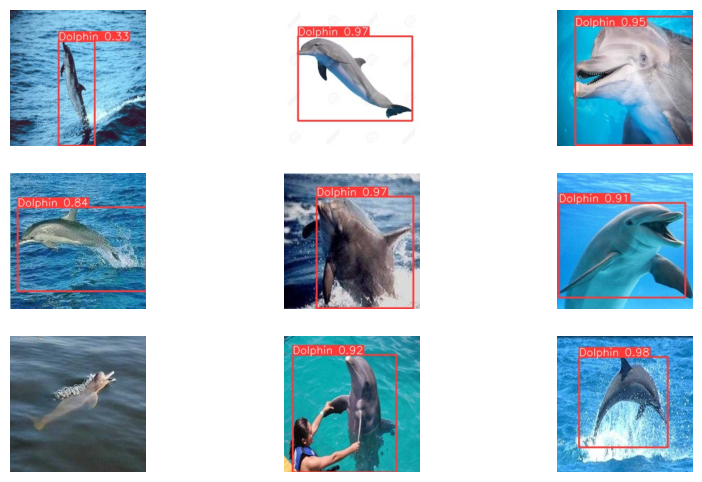

In [ ]:
plt.figure(figsize = (10,6))
img_folder = modelTest[0].save_dir
all_files = os.listdir(img_folder)
data_path = [os.path.join(img_folder + "/" + i) for i in all_files]
sample = random.sample(data_path, 9)

for count,i in enumerate(sample):
    plt.subplot(int(len(sample)/3),int(len(sample)/3),count+1)
    plt.imshow(plt.imread(i))
    plt.axis('off')
plt.show()

## 5. Display Results
Displaying plots and results and comparing the images

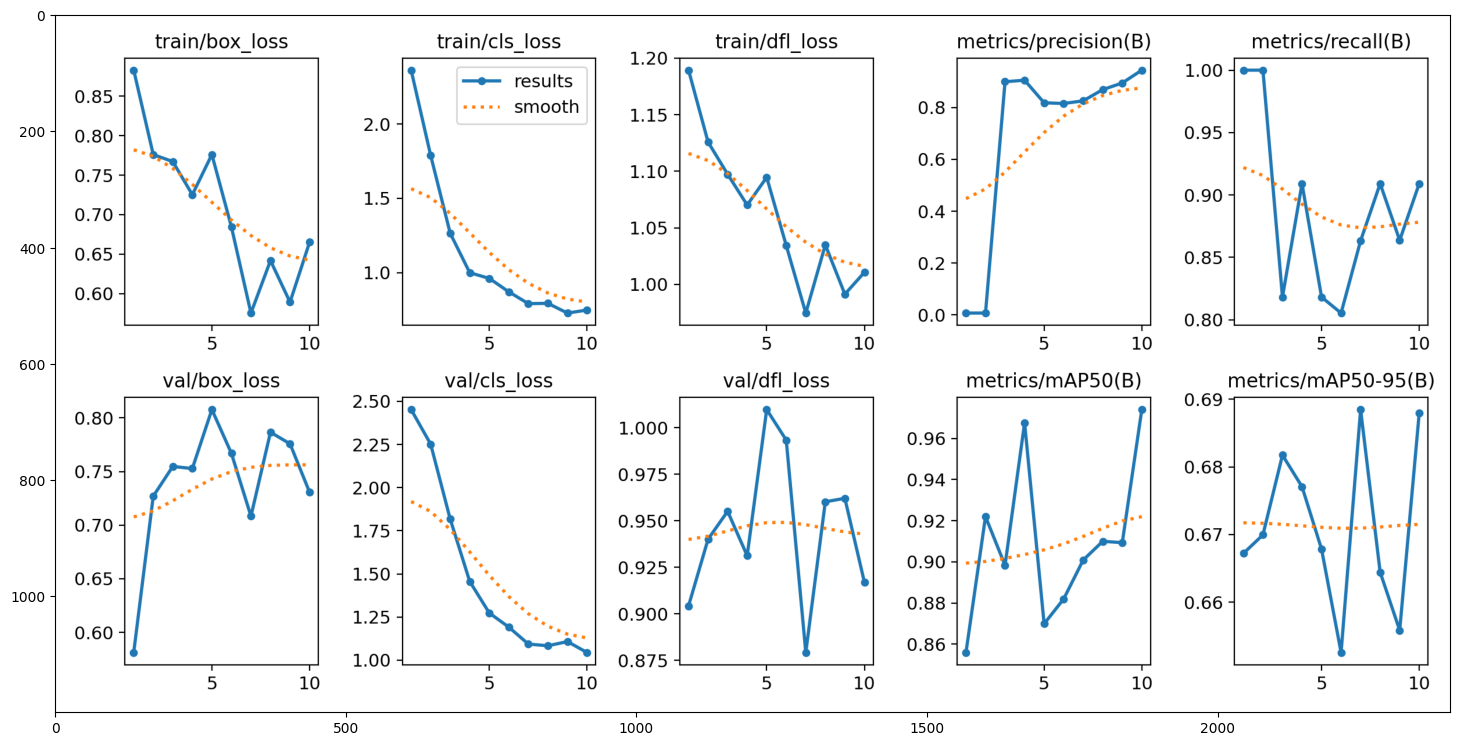

In [ ]:
plt.figure(figsize=(18,10))
plt.imshow(plt.imread(trainPath + '/results.png'))
plt.show()

### Val Results

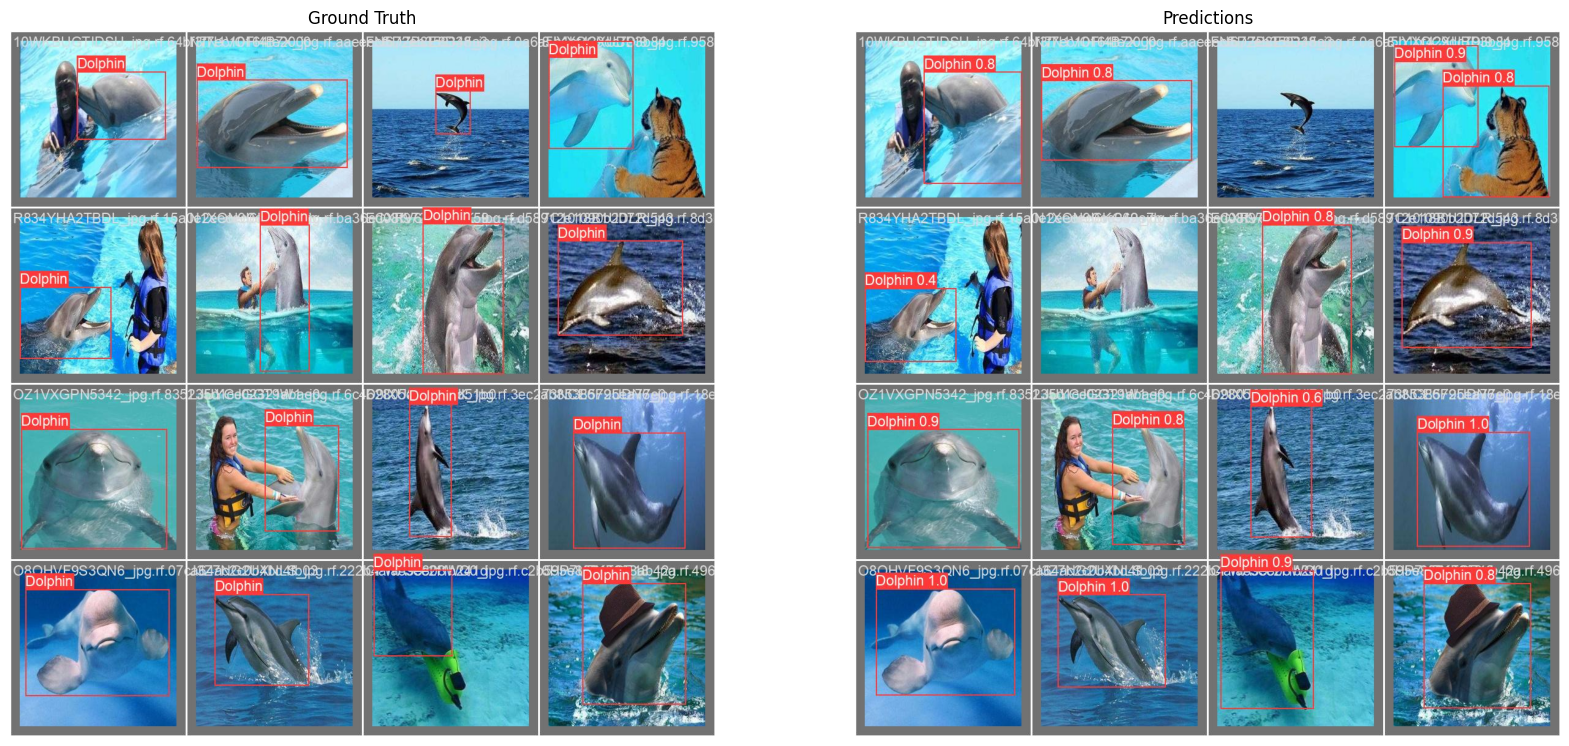

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("Ground Truth")
plt.imshow(plt.imread(valPath+'/val_batch0_labels.jpg'))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Predictions")
plt.imshow(plt.imread(valPath+'/val_batch0_pred.jpg'))
plt.axis('off')

plt.show()

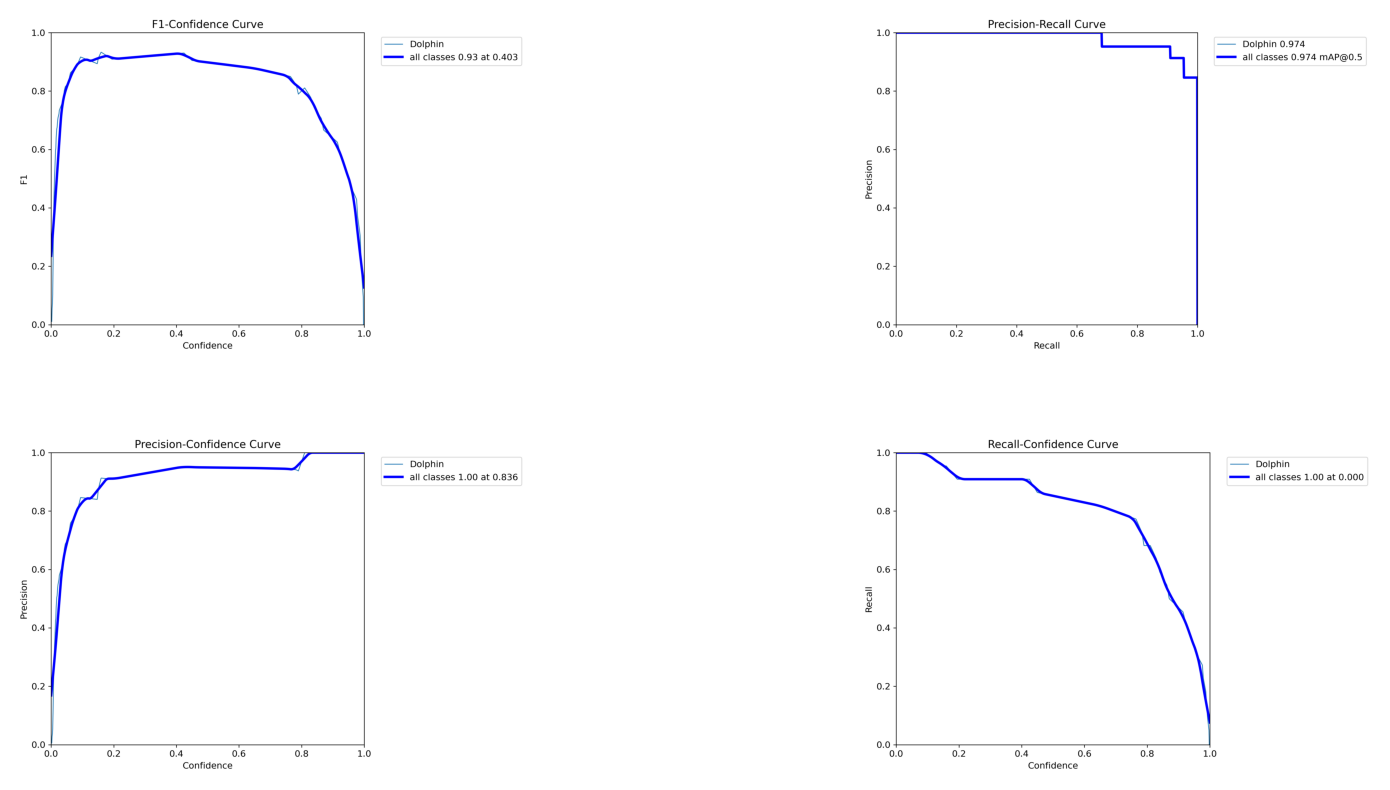

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(plt.imread(valPath + '/F1_curve.png'))
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(plt.imread(valPath + '/PR_curve.png'))
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(plt.imread(valPath + '/P_curve.png'))
plt.axis('off')


plt.subplot(2,2,4)
plt.imshow(plt.imread(valPath + '/R_curve.png'))
plt.axis('off')

plt.show()

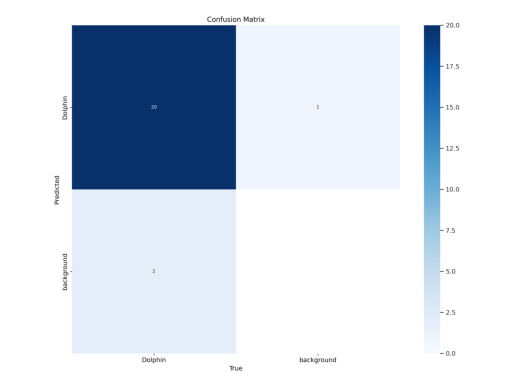

In [ ]:
plt.imshow(plt.imread(valPath + '/confusion_matrix.png'))
plt.axis('off')
plt.show()